## Data pre-processing

In [174]:
# import libarary
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# import library
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
# load data 
# simpan dalam dt
data = pd.read_csv("../data/raw/ObesityDataSet_raw_and_data_sinthetic.csv")

In [176]:
data.sample(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1211,Male,30.551762,1.784377,102.872505,yes,yes,2.271306,3.000000,Sometimes,no,1.771198,no,2.000000,0.413752,Sometimes,Automobile,Obesity_Type_I
127,Female,19.000000,1.650000,61.000000,no,yes,3.000000,1.000000,Sometimes,no,3.000000,yes,1.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
289,Male,19.000000,1.880000,79.000000,no,no,2.000000,3.000000,Sometimes,no,3.000000,no,3.000000,0.000000,Sometimes,Automobile,Normal_Weight
1291,Male,22.720449,1.650000,89.139209,yes,yes,2.103335,2.964024,Sometimes,no,3.000000,no,0.632947,1.000000,no,Public_Transportation,Obesity_Type_I
1792,Male,24.002404,1.609418,100.078367,yes,yes,2.885693,1.685134,Sometimes,no,1.011849,no,0.503105,1.217929,no,Public_Transportation,Obesity_Type_II
513,Female,21.243142,1.598019,44.845655,no,no,3.000000,1.726260,Frequently,no,2.444125,no,1.318170,0.000000,no,Public_Transportation,Insufficient_Weight
545,Female,23.000000,1.728834,51.442293,yes,yes,2.000000,3.000000,Frequently,no,1.229915,no,0.619533,2.000000,no,Public_Transportation,Insufficient_Weight
1576,Male,26.957645,1.780731,112.957922,yes,yes,2.263245,3.000000,Sometimes,no,2.092509,no,0.000000,1.836853,Sometimes,Automobile,Obesity_Type_II
858,Male,26.047077,1.745950,80.018571,yes,yes,1.993101,3.171082,Sometimes,no,2.364498,no,1.224743,0.022245,Sometimes,Public_Transportation,Overweight_Level_I
1363,Male,31.335093,1.665798,89.738596,yes,yes,2.274164,1.049534,Sometimes,no,1.358172,no,1.482411,0.000000,Sometimes,Automobile,Obesity_Type_I


In [177]:
data['NObeyesdad'].value_counts(normalize=True)

NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64

- Frequent consumption of high caloric food (FAVC) : bool
- Frequency of consumption of vegetables (FCVC) : category 
- Number of main meals (NCP): category (serving)
- Consumption of food between meals (CAEC): category
- Consumption of water daily (CH20) : category (Liter)
- Consumption of alcohol (CALC) : bool
- Calories consumption monitoring (SCC) : bool
- Physical activity frequency (FAF) : int
- Time using technology devices (TUE) : bool
- Transportation used (MTRANS) : category

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [179]:
# defient function to change float value to time
def workout_day(x):
    """function yang mentrasformasi kekuatan dengan merujuk kuat beton yang sering digunakan"""
    if x <= 1:
        t = 1
        return t
    elif x <= 2:
        t = 2
        return t
    else:
        t = 3
        return t

In [180]:
# transform data to category
data["FAF"] = data["FAF"].apply(workout_day)

In [181]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.501658,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.658068,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,1.000000,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [182]:
data['family_history_with_overweight'].value_counts(normalize=True)

family_history_with_overweight
yes    0.817622
no     0.182378
Name: proportion, dtype: float64

<Axes: xlabel='CALC', ylabel='count'>

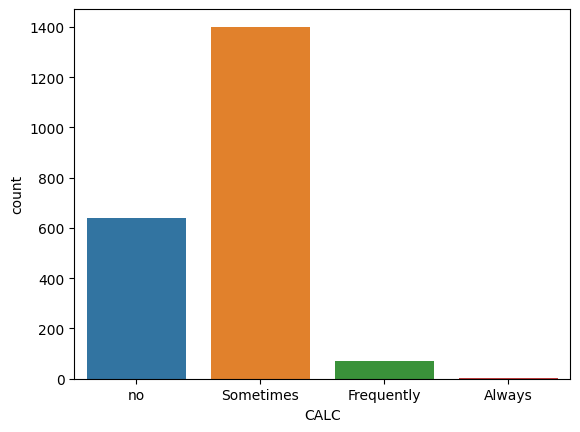

In [183]:
sns.countplot(x=data["CALC"])

In [184]:
data["CALC"].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [185]:
data["CALC"] = data["CALC"].replace(["Frequently", "Always"], "Others")

<Axes: xlabel='MTRANS', ylabel='count'>

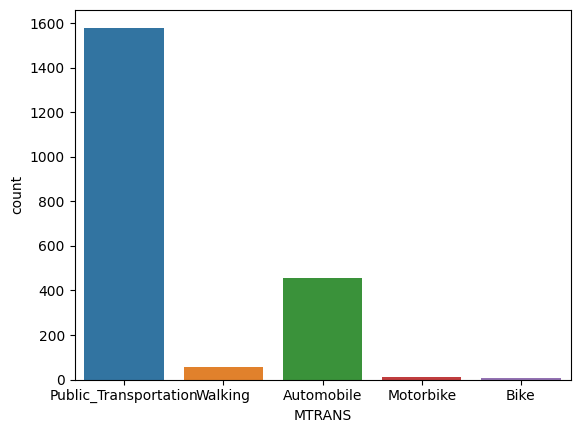

In [186]:
sns.countplot(x=data["MTRANS"])

In [187]:
data["MTRANS"].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [188]:
data["MTRANS"] = data["MTRANS"].replace(["Walking", "Motorbike", "Bike"], "Others")

In [189]:
nor_weight_data = data[data['NObeyesdad']=="Normal_Weight"]

Drop feature
- Calories consumption monitoring (SCC) : bool
- Time using technology devices (TUE) : bool

In [190]:
# drop feature
drop_column = ["SCC", "TUE","NObeyesdad"]
nor_weight_data = nor_weight_data.drop(columns = drop_column)

In [191]:
# sanity Check 
nor_weight_data.sample(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,CALC,MTRANS
138,Male,31.0,1.76,75.0,yes,no,3.0,3.0,Always,no,3.0,3,no,Others
246,Female,20.0,1.57,60.0,no,yes,3.0,3.0,Sometimes,no,3.0,1,Sometimes,Public_Transportation
163,Male,25.0,1.89,75.0,no,no,3.0,3.0,Frequently,no,2.0,3,no,Public_Transportation


In [192]:
# buat output data
# target yang dicari kekuatan beton pada campuran mix desain 
y = nor_weight_data["FAF"]

In [193]:
# buat imput data
x = nor_weight_data.drop(["FAF"], axis = 1)

In [194]:
y.sample(3)

489    1
296    2
436    1
Name: FAF, dtype: int64

In [195]:
x.shape

(287, 13)

In [196]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    random_state = 28)

In [197]:
# Sanity Check
print(x_train.shape)
print(x_test.shape)

(215, 13)
(72, 13)


In [198]:
# ratio
x_test.shape[0]/x.shape[0]

# hasilnya 0.25 sesuai ketentuan sebelumnya

0.2508710801393728

## EDA

In [199]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

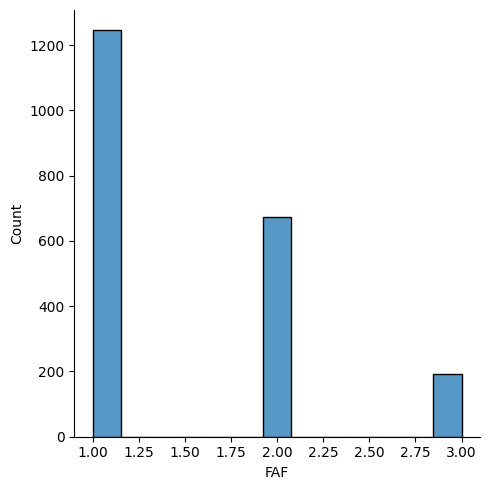

In [200]:
# check histogram fly_ash
sns.displot(data=data, x="FAF")

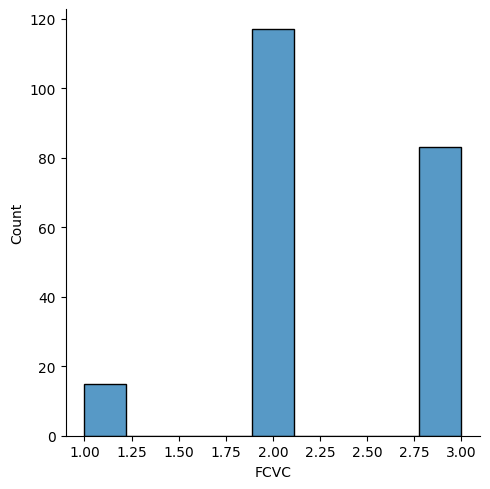

In [201]:
# check histogram fly_ash
sns.displot(data=x_train, x="FCVC")

## Data imputation

In [202]:
x_train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
CALC                              0
MTRANS                            0
dtype: int64

**Bedakan antara data categorical & numerical**

In [203]:
x_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,CALC,MTRANS
286,Female,21.0,1.60,61.0,no,yes,2.0,3.0,Sometimes,no,1.0,Sometimes,Public_Transportation
337,Male,18.0,1.78,64.4,yes,yes,3.0,3.0,Frequently,no,2.0,no,Others
93,Female,20.0,1.60,57.0,no,no,3.0,3.0,Always,no,2.0,no,Others
42,Female,21.0,1.66,64.0,yes,yes,1.0,3.0,Sometimes,no,1.0,no,Public_Transportation
353,Female,24.0,1.60,51.0,yes,yes,1.0,3.0,Sometimes,no,2.0,Sometimes,Automobile


Data kategori:
- Gender
- family_history_with_overweight
- FAVC
- CAEC
- SMOKE
- CALC
- MTRANS

**Numerical Imputation**

In [204]:
x_train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'CALC', 'MTRANS'],
      dtype='object')

In [205]:
# Buat kategori numerik
numerical_column = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O']

In [206]:
# Seleksi dataframe numerik
x_train_numerical = x_train[numerical_column]

In [207]:
x_train_numerical.sample(4)

,Age,Height,Weight,FCVC,NCP,CH2O
275,18.0,1.50,50.0,3.0,3.0,2.0
235,19.0,1.69,70.0,2.0,1.0,2.0
236,21.0,1.66,59.0,1.0,3.0,2.0
114,19.0,1.61,62.0,3.0,1.0,2.0


**Cek apakah ada data numerik yang kosong**

In [208]:
x_train_numerical.isnull().any()

Age       False
Height    False
Weight    False
FCVC      False
NCP       False
CH2O      False
dtype: bool

**Categorical Imputation**

In [209]:
# Ambil daftar nama kolom kategorikal
# Anda bisa langsung menuliskannya atau mengambil list jika jumlahnya banyak

x_train_column = list(x_train.columns)
categorical_column = list(set(x_train_column).difference(set(numerical_column)))

In [210]:
categorical_column

['CALC',
 'family_history_with_overweight',
 'MTRANS',
 'SMOKE',
 'CAEC',
 'FAVC',
 'Gender']

In [211]:
# Periksa lagi missing value
categorical_data = x_train[categorical_column]
categorical_data.isnull().sum()

CALC                              0
family_history_with_overweight    0
MTRANS                            0
SMOKE                             0
CAEC                              0
FAVC                              0
Gender                            0
dtype: int64

In [212]:
categorical_data

,CALC,family_history_with_overweight,MTRANS,SMOKE,CAEC,FAVC,Gender
286,Sometimes,no,Public_Transportation,no,Sometimes,yes,Female
337,no,yes,Others,no,Frequently,yes,Male
93,no,no,Others,no,Always,no,Female
42,no,yes,Public_Transportation,no,Sometimes,yes,Female
353,Sometimes,yes,Automobile,no,Sometimes,yes,Female
...,...,...,...,...,...,...,...
455,Sometimes,no,Public_Transportation,no,Frequently,yes,Male
51,Sometimes,no,Automobile,no,Sometimes,yes,Female
485,Sometimes,yes,Public_Transportation,no,Always,yes,Male
7,Sometimes,no,Public_Transportation,no,Sometimes,no,Male


### **Preprocessing Categorical Variables**

- Kita tidak bisa memasukkan data categorical, jika tidak diubah menjadi numerical
- Solusi: One Hot Encoding (OHE)

In [213]:
def categoricalImputation(data, categorical_column):
    """
    Fungsi untuk melakukan imputasi data kategorik
    :param data: <pandas dataframe> sample data input
    :param categorical_column: <list> list kolom kategorikal data
    :return categorical_data: <pandas dataframe> data kategorikal
    """
    # seleksi data
    categorical_data = data[categorical_column]

    # lakukan imputasi
    categorical_data = categorical_data.fillna(value="KOSONG")

    return categorical_data

In [214]:
def extractCategorical(data, categorical_column):
    """
    Fungsi untuk ekstrak data kategorikal dengan One Hot Encoding
    :param data: <pandas dataframe> data sample
    :param categorical_column: <list> list kolom kategorik
    :return categorical_ohe: <pandas dataframe> data sample dengan ohe
    """
    data_categorical = categoricalImputation(data = data,
                                             categorical_column = categorical_column)
    categorical_ohe = pd.get_dummies(data_categorical)

    return categorical_ohe

In [215]:
x_train_categorical_ohe = extractCategorical(data = x_train,
                                             categorical_column = categorical_column)

In [216]:
x_train_categorical_ohe.head()

,CALC_Others,CALC_Sometimes,CALC_no,family_history_with_overweight_no,family_history_with_overweight_yes,MTRANS_Automobile,MTRANS_Others,MTRANS_Public_Transportation,SMOKE_no,SMOKE_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,FAVC_no,FAVC_yes,Gender_Female,Gender_Male
286,False,True,False,True,False,False,False,True,True,False,False,False,True,False,False,True,True,False
337,False,False,True,False,True,False,True,False,True,False,False,True,False,False,False,True,False,True
93,False,False,True,True,False,False,True,False,True,False,True,False,False,False,True,False,True,False
42,False,False,True,False,True,False,False,True,True,False,False,False,True,False,False,True,True,False
353,False,True,False,False,True,True,False,False,True,False,False,False,True,False,False,True,True,False


In [217]:
# Simpan kolom OHE untuk diimplementasikan dalam testing data
# Agar shape-nya konsisten
ohe_columns = x_train_categorical_ohe.columns

In [218]:
ohe_columns

Index(['CALC_Others', 'CALC_Sometimes', 'CALC_no',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'MTRANS_Automobile',
       'MTRANS_Others', 'MTRANS_Public_Transportation', 'SMOKE_no',
       'SMOKE_yes', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes',
       'CAEC_no', 'FAVC_no', 'FAVC_yes', 'Gender_Female', 'Gender_Male'],
      dtype='object')

### **Join data Numerical dan Categorical**

- Data numerik & kategorik harus disatukan kembali
- Penyatuan dengan `pd.concat`

In [219]:
x_train_concat = pd.concat([x_train_numerical,
                            x_train_categorical_ohe],
                           axis = 1)

In [220]:
x_train_concat.head()

,Age,Height,Weight,FCVC,NCP,CH2O,CALC_Others,CALC_Sometimes,CALC_no,family_history_with_overweight_no,...,SMOKE_no,SMOKE_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,FAVC_no,FAVC_yes,Gender_Female,Gender_Male
286,21.0,1.60,61.0,2.0,3.0,1.0,False,True,False,True,...,True,False,False,False,True,False,False,True,True,False
337,18.0,1.78,64.4,3.0,3.0,2.0,False,False,True,False,...,True,False,False,True,False,False,False,True,False,True
93,20.0,1.60,57.0,3.0,3.0,2.0,False,False,True,True,...,True,False,True,False,False,False,True,False,True,False
42,21.0,1.66,64.0,1.0,3.0,1.0,False,False,True,False,...,True,False,False,False,True,False,False,True,True,False
353,24.0,1.60,51.0,1.0,3.0,2.0,False,True,False,False,...,True,False,False,False,True,False,False,True,True,False


### **Standardizing Variables**

- Menyamakan skala dari variabel input
- `fit`: imputer agar mengetahui mean dan standar deviasi dari setiap kolom
- `transform`: isi data dengan value yang sudah dinormalisasi
- output dari transform berupa pandas dataframe
- normalize dikeluarkan karena akan digunakan pada data test

In [221]:
from sklearn.preprocessing import StandardScaler

# Buat fungsi
def standardizerData(data):
    """
    Fungsi untuk melakukan standarisasi data
    :param data: <pandas dataframe> sampel data
    :return standardized_data: <pandas dataframe> sampel data standard
    :return standardizer: method untuk standardisasi data
    """
    data_columns = data.columns  # agar nama kolom tidak hilang
    data_index = data.index  # agar index tidak hilang

    # buat (fit) standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [222]:
x_train_clean, standardizer = standardizerData(data = x_train_concat)

In [223]:
x_train_clean.sample(5)

,Age,Height,Weight,FCVC,NCP,CH2O,CALC_Others,CALC_Sometimes,CALC_no,family_history_with_overweight_no,...,SMOKE_no,SMOKE_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,FAVC_no,FAVC_yes,Gender_Female,Gender_Male
138,1.879130,0.818403,1.392539,1.146271,0.296346,1.786597,-0.253686,-1.134563,1.286204,-0.923823,...,0.220863,-0.220863,2.483277,-0.600633,-1.123903,-0.196589,1.664911,-1.664911,-0.915209,0.915209
214,-0.107168,-0.349686,-1.039327,-0.530248,0.296346,0.172654,-0.253686,0.881396,-0.777482,-0.923823,...,0.220863,-0.220863,-0.402694,-0.600633,0.889757,-0.196589,-0.600633,0.600633,-0.915209,0.915209
412,2.276390,1.774113,2.497932,-0.530248,0.296346,0.172654,-0.253686,0.881396,-0.777482,1.082459,...,0.220863,-0.220863,-0.402694,1.664911,-1.123903,-0.196589,-0.600633,0.600633,-0.915209,0.915209
49,-0.107168,-1.411585,-1.370945,-0.530248,0.296346,0.172654,-0.253686,0.881396,-0.777482,1.082459,...,0.220863,-0.220863,-0.402694,-0.600633,0.889757,-0.196589,-0.600633,0.600633,1.092647,-1.092647
463,-0.901687,1.243163,0.618763,-0.530248,0.296346,-1.441289,-0.253686,0.881396,-0.777482,-0.923823,...,0.220863,-0.220863,-0.402694,-0.600633,0.889757,-0.196589,1.664911,-1.664911,-0.915209,0.915209


## Training Machine Learning:

### **Benchmark / Baseline**

- Baseline untuk evaluasi nanti
- Karena ini klasifikasi, bisa kita ambil dari proporsi kelas target yang terbesar
- Menurut anjuran aktivitas di masyarakat adalah 2 hari dalam seminggu untuk berolahraga

In [224]:
y_train.value_counts(normalize=True)

FAF
1    0.595349
2    0.251163
3    0.153488
Name: proportion, dtype: float64

Baseline yang digunakan adalah 59.53%

### **1. Import Model**

- Misal kita gunakan 2 model ML untuk klasifikasi:
    - K-nearest neighbor (K-NN)
    - Random Forest

In [225]:
# Import dari sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans

In [226]:
# Model Random Forest Regression
RF_class = RandomForestClassifier(random_state=123)
RF_class.fit(x_train_clean, y_train)

RandomForestClassifier(random_state=123)

In [227]:
# Model KNN Regression
KNN_Class = KNeighborsClassifier()
KNN_Class.fit(x_train_clean, y_train)

KNeighborsClassifier()

## Prediction

In [228]:
# random_forest prediction
RF_class.predict(x_train_clean.sample(3))

array([1, 1, 2])

In [229]:
# KNN prediction
KNN_Class.predict(x_train_clean.sample(3))

array([1, 1, 1])

## Cek prediksi dengan benchmark

In [230]:
# akurasi random forest
RF_class.score(x_train_clean,y_train)

1.0

In [231]:
# akurasi knn
KNN_Class.score(x_train_clean,y_train)

0.6558139534883721

## test prediction

In [232]:
def testPrediction(X_test, y_test, classifier, compute_score):
    """
    Fungsi untuk mendapatkan prediksi dari model
    :param X_test: <pandas dataframe> input
    :param y_test: <pandas series> output/target
    :param classifier: <sklearn method> model klasifikasi
    :param compute_score: <bool> True: menampilkan score, False: tidak
    :return test_predict: <list> hasil prediksi data input
    :return score: <float> akurasi model
    """
    if compute_score:
        score = classifier.score(X_test, y_test)
        print(f"Accuracy : {score:.4f}")

    test_predict = classifier.predict(X_test)

    return test_predict, score

In [233]:
# encode data set
x_test_categorical_ohe = extractCategorical(data = x_test,
                                             categorical_column = categorical_column)

In [234]:
# Seleksi dataframe numerik
x_test_numerical = x_test[numerical_column]

In [235]:
# gambung numerik dan categorical data test
x_test_concat = pd.concat([x_test_numerical,
                            x_test_categorical_ohe],
                           axis = 1)

In [236]:
# standarisasi data
x_test_clean,standardizer = standardizerData(data = x_test_concat)

In [237]:
# sanity test 
x_test_clean.head()

,Age,Height,Weight,FCVC,NCP,CH2O,CALC_Others,CALC_Sometimes,CALC_no,family_history_with_overweight_no,...,SMOKE_no,SMOKE_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,FAVC_no,FAVC_yes,Gender_Female,Gender_Male
211,-0.256468,-0.299224,-1.051423,-0.686406,-1.828100,-1.075888,-0.301511,-1.118034,1.330124,1.087115,...,0.208514,-0.208514,-0.273179,-0.751809,0.919866,-0.169031,-0.663325,0.663325,0.821230,-0.821230
26,-0.256468,0.458610,0.361690,-0.686406,-1.828100,0.413803,3.316625,-1.118034,-0.751809,-0.919866,...,0.208514,-0.208514,-0.273179,1.330124,-1.087115,-0.169031,-0.663325,0.663325,-1.217686,1.217686
254,-0.064117,-0.190962,-0.546740,1.078639,0.312115,0.413803,-0.301511,-1.118034,1.330124,-0.919866,...,0.208514,-0.208514,-0.273179,-0.751809,0.919866,-0.169031,1.507557,-1.507557,0.821230,-0.821230
382,1.282341,-0.624011,-0.546740,-0.686406,0.312115,-1.075888,-0.301511,0.894427,-0.751809,-0.919866,...,0.208514,-0.208514,-0.273179,1.330124,-1.087115,-0.169031,1.507557,-1.507557,0.821230,-0.821230
440,-0.833522,-1.165321,-0.546740,-0.686406,0.312115,-1.075888,-0.301511,-1.118034,1.330124,1.087115,...,0.208514,-0.208514,-0.273179,-0.751809,0.919866,-0.169031,-0.663325,0.663325,0.821230,-0.821230


In [238]:
# Random Forest Performance
random_forest_test_predict, score = testPrediction(X_test = x_test_clean,
                                            y_test = y_test,
                                            classifier = RF_class,
                                            compute_score = True)

Accuracy : 0.6250


In [239]:
# KNN Performance
KNN_test_predict, score = testPrediction(X_test = x_test_clean,
                                            y_test = y_test,
                                            classifier = KNN_Class,
                                            compute_score = True)

Accuracy : 0.5833


- Dari beberapa model yang digunakan random forest memiliki Accuracy paling tinggi
- hypertuning akan dilakukan pada semua model

### Hypertuning the model

#### Random forest 

In [240]:
from pprint import pprint

In [241]:
# Model Random Forest Classifier
RFC = RandomForestClassifier(random_state=123)
RFC.fit(x_train_clean, y_train)

RandomForestClassifier(random_state=123)

In [242]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RFC.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}


In [243]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [244]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation,
RF = RandomForestClassifier()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_clean, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  18.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  18.4s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  18.9s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  20.6s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   7.4s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   7.9s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   8.6s


[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  36.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  35.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   8.9s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  36.1s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  36.6s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  23.4s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  24.0s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   9.5s
[CV] END bootstrap=False, max_depth=10, min_sa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [245]:
# random forest optimal parameter
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 30,
 'bootstrap': True}

In [246]:
# cek score in train dataset
rf_random.score(x_train_clean, y_train)

0.6930232558139535

In [247]:
# Random Forest Performance
random_forest_test_predict_HT, score = testPrediction(X_test = x_test_clean,
                                            y_test = y_test,
                                            classifier = rf_random,
                                            compute_score = True)

Accuracy : 0.6667


##### Recall, precision, f1_score Random forest

In [248]:
from sklearn.metrics import confusion_matrix

# gunakan prediksi dari x_test sebagai y_prediction
y_pred1 = rf_random.predict(x_test_clean)

# labels dari target value y
labels = [1,2,3]

# confusion matrix
cm1 = confusion_matrix(y_test,y_pred1,labels=labels)
cm_df1 = pd.DataFrame(cm1, index=labels, columns=labels)
print(cm_df1)

    1  2  3
1  48  1  0
2  15  0  0
3   7  1  0


In [288]:
from sklearn.metrics import precision_recall_fscore_support

# recall, precision and f1_score
result = []
for label in labels:
    precision, recall, f_score, support = precision_recall_fscore_support(
        y_test == label, y_pred1 == label, average='weighted', zero_division=0
    )
    result.append([label, recall, precision, f_score])
df = pd.DataFrame(result, columns=['label', 'recall', 'precision', 'f1_score'])
print(df)

   label    recall  precision  f1_score
0      1  0.680556   0.626389  0.574575
1      2  0.763889   0.622024  0.685696
2      3  0.888889   0.790123  0.836601


#### KNN 

In [258]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(KNN_Class.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [259]:
# KNN
# Number of trees in random forest
n_neighbors = [5,7,9,11,13,15,25,38,45]
# weights: Check whether adding weights to the data points is beneficial to the model or not
weights = ['uniform','distance']
# metric: The distance metric to be used will calculating the similarity.
metric = ['minkowski','euclidean','manhattan']
# metric: The distance metric to be used will calculating the similarity.
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Create the random grid
random_grid_knn = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric': metric,
               'algorithm': algorithm
                }

pprint(random_grid_knn)

{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'metric': ['minkowski', 'euclidean', 'manhattan'],
 'n_neighbors': [5, 7, 9, 11, 13, 15, 25, 38, 45],
 'weights': ['uniform', 'distance']}


In [274]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation,
knn = KNeighborsClassifier()
# search across 100 different combinations, and use all available cores
knn_random = RandomizedSearchCV(estimator = knn, param_distributions = random_grid_knn, n_iter = 200, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
knn_random.fit(x_train_clean, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] END algorithm=brute, metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s[CV] END algorithm=brute, metric=manhattan, n_neighbors=7, weights=dista

[CV] END algorithm=brute, metric=minkowski, n_neighbors=38, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=manhattan, n_neighbors=38, weights=distance; total time=   0.1s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=38, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, metric=euclidean, n_neighbors=25, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=38, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=38, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=38, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=38, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=38, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=minkowski, n_neighbors=38, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metr

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15, 25,
                                                        38, 45],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=2)

In [275]:
knn_random.best_params_

{'weights': 'distance',
 'n_neighbors': 38,
 'metric': 'manhattan',
 'algorithm': 'brute'}

In [276]:
knn_random.score(x_train_clean, y_train)

1.0

In [277]:
# Random Forest Performance
KNN_test_predict_HT, score = testPrediction(X_test = x_test_clean,
                                            y_test = y_test,
                                            classifier = knn_random,
                                            compute_score = True)

Accuracy : 0.6806


##### Recall, precision, f1_score KNN 

In [289]:
from sklearn.metrics import confusion_matrix

# gunakan prediksi dari x_test sebagai y_prediction
y_pred2 = knn_random.predict(x_test_clean)

# Predict the classes on the test data, and return the probabilities for each class
y_proba2 = knn_random.predict_proba(x_test_clean)

# labels dari target value y
labels = [1,2,3]

# confusion matrix
cm2 = confusion_matrix(y_test,y_pred1,labels=labels)
cm_df2 = pd.DataFrame(cm1, index=labels, columns=labels)
print(cm_df2)

    1  2  3
1  48  1  0
2  15  0  0
3   7  1  0


In [290]:
import seaborn as sns

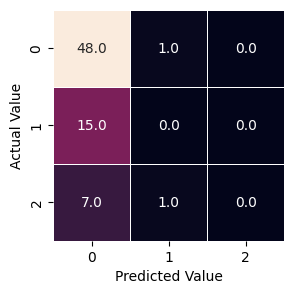

In [294]:
plt.figure(figsize=(3,3))
sns.heatmap(cm2, annot = True, fmt = '0.1f', linewidth=0.5,
            square = True, cbar= False)
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.show()

In [287]:
from sklearn.metrics import precision_recall_fscore_support

# recall, precision, f1_score
result = []
for label in labels:
    precision, recall, f_score, support = precision_recall_fscore_support(
        y_test == label, y_pred2 == label, average='weighted', zero_division=0
    )
    result.append([label, recall, precision, f_score])
df = pd.DataFrame(result, columns=['label', 'recall', 'precision', 'f1_score'])
print(df)

   label    recall  precision  f1_score
0      1  0.680556   0.463156  0.551194
1      2  0.791667   0.626736  0.699612
2      3  0.888889   0.790123  0.836601
